In [28]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
#a
regression_path = os.path.join(os.getcwd(), 'data', 'regression_part1.csv')
regression = pd.read_csv(regression_path)
regression.insert(0,'pre_pend',1)
print("The basic information about the variables:")
display(regression.info())
print("The summary statistics of the data:")
display(regression.describe())

The basic information about the variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
pre_pend         50 non-null int64
revision_time    50 non-null float64
exam_score       50 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


None

The summary statistics of the data:


,pre_pend,revision_time,exam_score
count,50.0,50.000000,50.000000
mean,1.0,22.220020,49.919860
std,0.0,13.986112,20.925594
min,1.0,2.723000,14.731000
25%,1.0,8.570500,32.125000
50%,1.0,21.688000,47.830500
75%,1.0,32.257500,65.069750
max,1.0,48.011000,94.945000


In [30]:
#b
data = regression.copy(deep=True)
X = data[['pre_pend','revision_time']]
y = data['exam_score']
lm = LinearRegression(fit_intercept=False, normalize=True, copy_X=True, n_jobs=1)    
lm.fit(X, y)
parameters = [lm.intercept_, lm.coef_]
print(parameters)

[0.0, array([17.89768026,  1.44114091])]


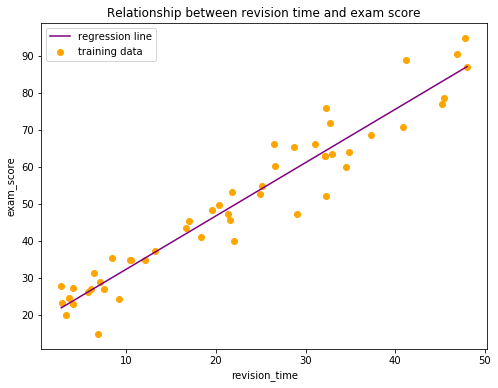

In [31]:
#c
data = regression.sort_values(by=['revision_time'])
X0 = data['revision_time'][:,np.newaxis]
y0 = data['exam_score'][:,np.newaxis]
lm = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)    
lm.fit(X0, y0)
plt.figure(figsize=(8,6))
plt.scatter(X0, y0, label='training data', color='orange')
y_pred = lm.predict(X0)
plt.plot(X0, y_pred, color='purple', label='regression line')
plt.xlabel("revision_time")
plt.ylabel("exam_score")
plt.title('Relationship between revision time and exam score')
plt.legend(loc='upper left')
plt.show()

In [32]:
#d
#m = (len(X0) * np.sum(X0 * y0) - np.sum(X0) * np.sum(y0)) / (len(X0) * np.sum(X0 * X0) - np.sum(X0) ** 2)
#b = (np.sum(y0) - m * np.sum(X0)) / len(X0)
#w = [b,m]
w = np.dot(np.linalg.inv(X.T.dot(X)), X.T.dot(y))

print(w)

[17.89768026  1.44114091]


In [33]:
#f
print("Mean squared error using scikit-learn: " ,mean_squared_error(y, y_pred))
MSE = mean_squared_error(y, X.dot(w))
print("Mean squared error using closed-form: " , MSE)

Mean squared error using scikit-learn:  30.98547261454129
Mean squared error using closed-form:  30.985472614541287


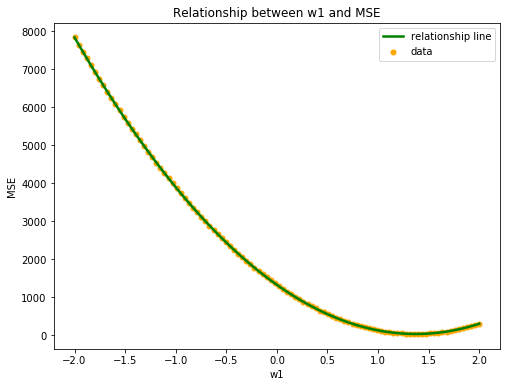

Minima: 32.48096161535148
Index at minima: 1.3535353535353538


In [36]:
#g
w1 = np.linspace(-2,2,100)
pred = [20 + X0 * i for i in w1]
MSE = [np.sum((y0-i)**2)/len(y0) for i in pred] 
plt.figure(figsize=(8,6))
plt.scatter(w1, MSE, label="data", color="orange", s=25)
plt.plot(w1, MSE, color='green', label='relationship line', linewidth=2.5)
plt.title('Relationship between w1 and MSE')
plt.xlabel('w1')
plt.ylabel('MSE')
plt.legend()
plt.show()
print('Minima:', min(MSE))
print('Index at minima:', w1[MSE.index(min(MSE))])